In [30]:
# ** COMP309 Project **
# Johniel Bocacao
# 300490028

###
# Step 0: Load data
###

import os
import torch
from PIL import Image
from torchvision.transforms import ToTensor

base_dir = "traindata"
train_list = []
y_train = []
throwout_count = 0
for class_type in sorted(os.listdir(base_dir)):
    if class_type == ".DS_Store": continue
    subdir = os.path.join(base_dir, class_type)
    for filename in sorted(os.listdir(subdir)):
        if filename == ".DS_Store": continue
        filepath = os.path.join(subdir, filename)
        image = ToTensor()(Image.open(filepath)).unsqueeze(0)
        if list(image.size())[1:] == [3, 300, 300]:
            train_list.append(image)
            y_train.append(class_type)
        else:
            print(filepath, "is not size 300x300, image is:", image.size())
            throwout_count += 1

X_train = torch.Tensor((len(train_list), 3, 300, 300))
torch.cat(train_list, out=X_train)
print(X_train.size())
print(len(y_train))
print(throwout_count, "images thrown out")

traindata/cherry/cherry_0113.jpg is not size 300x300, image is: torch.Size([1, 3, 230, 219])
traindata/cherry/cherry_0226.jpg is not size 300x300, image is: torch.Size([1, 3, 169, 299])
traindata/cherry/cherry_0257.jpg is not size 300x300, image is: torch.Size([1, 3, 229, 220])
traindata/cherry/cherry_0366.jpg is not size 300x300, image is: torch.Size([1, 3, 193, 261])
traindata/cherry/cherry_0519.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0549.jpg is not size 300x300, image is: torch.Size([1, 3, 251, 201])
traindata/cherry/cherry_0745.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0843.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0873.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_1005.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_1017.jpg is not size 300x300, image is: torch.

In [9]:
###
# Step 1: Conduct exploratory data analysis
###

tensor(-0.6392)

In [123]:
from torchvision.transforms import Normalize
import numpy as np
from matplotlib import pyplot as plt

norm = Normalize(0.5, 0.5)

def show_channel(img, ax=plt, title=""):
    npimg = img.numpy()
    ax.imshow(npimg, cmap="gray")
    ax.set_title(title)

def show_image(img, ax=plt, title=""):
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(title)

def plot_image_channels(img_tensor):
    fig, ax = plt.subplots(2,4, figsize=(10,5))
    show_image(img_tensor, ax[0,0], title="RGB")
    red = img_tensor[0]
    show_channel(red, ax[0, 1], title="Red")
    green = img_tensor[1]
    show_channel(green, ax[0, 2], title="Green")
    blue = img_tensor[2]
    show_channel(blue, ax[0, 3], title="Blue")
    greyscale = (red + green + blue) / 3
    show_channel(greyscale, ax[1,0], title="Greyscale")
    rg_diff = (red - green) / 2 + 0.5
    show_channel(rg_diff, ax[1,1], title="R-G difference")
    rb_diff = (red - blue) / 2 + 0.5
    show_channel(rb_diff, ax[1,2], title="R-B difference")
    gb_diff = (green - blue) / 2 + 0.5
    show_channel(gb_diff, ax[1,3], title="G-B difference")
    fig.tight_layout()

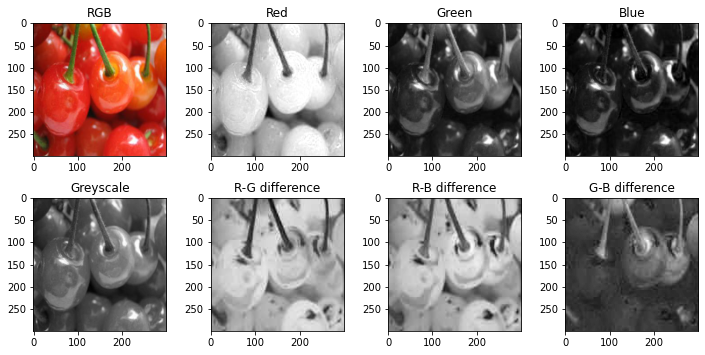

In [124]:
plot_image_channels(X_train[y_train.index('cherry') + 6])

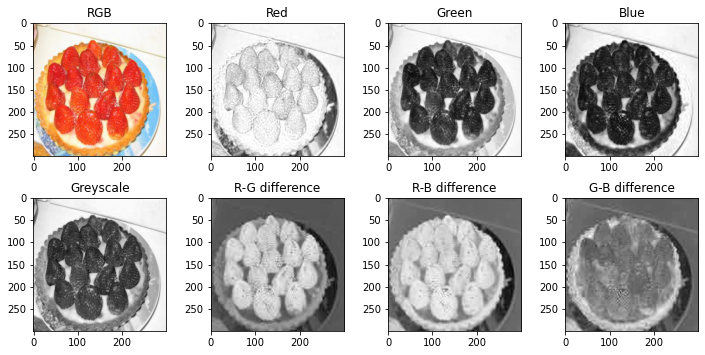

In [92]:
plot_image_channels(X_train[y_train.index('strawberry') + 4])

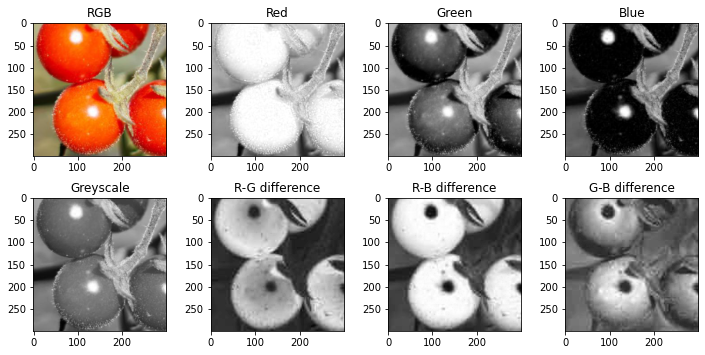

In [96]:
plot_image_channels(X_train[y_train.index('tomato') + 9])